In [ ]:
# https://joinmycode.tistory.com/m/113   // 참고 레퍼런스
# https://zzsza.github.io/data/2019/02/06/prophet/

In [ ]:
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as py
from prophet import Prophet
from prophet.plot import plot_plotly, add_changepoints_to_plot
import numpy as np

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.head()
#print('-' * 50)
#df.shape

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [ ]:
# 모델 생성/피팅/학습
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz9cf7sfo/69xoqxfm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz9cf7sfo/7memou69.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56509', 'data', 'file=/tmp/tmpz9cf7sfo/69xoqxfm.json', 'init=/tmp/tmpz9cf7sfo/7memou69.json', 'output', 'file=/tmp/tmpz9cf7sfo/prophet_model99a4qxxh/prophet_model-20231016102535.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:25:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:25:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# 예측
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [ ]:
# 예측 결과
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.210097,7.509031,8.914134
3266,2017-01-16,8.535122,7.839781,9.238224
3267,2017-01-17,8.322549,7.581720,9.030757
3268,2017-01-18,8.155179,7.384117,8.859531
3269,2017-01-19,8.167136,7.460474,8.919177


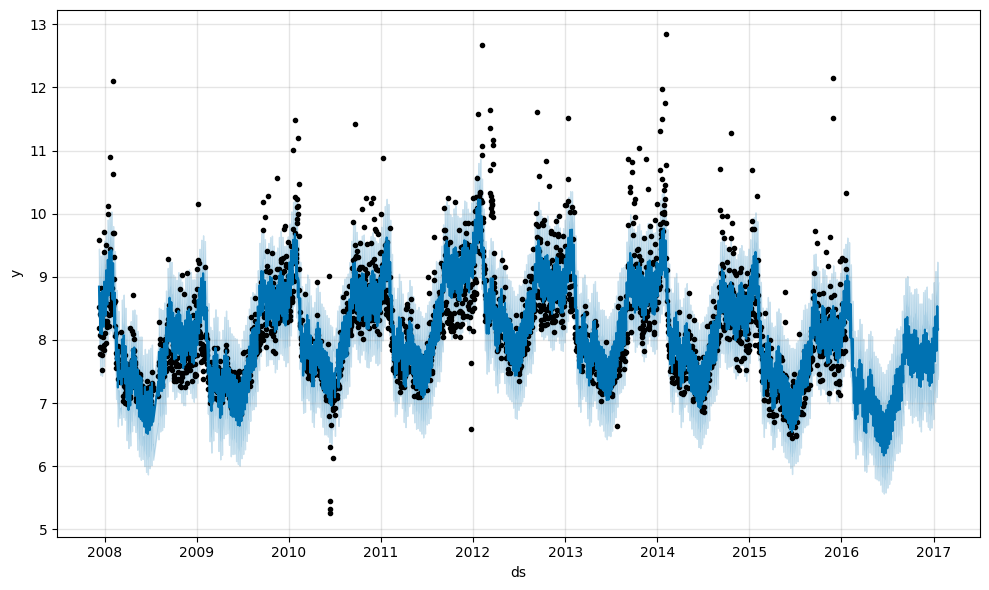

In [ ]:
# Plot 호출
fig1 = m.plot(forecast)

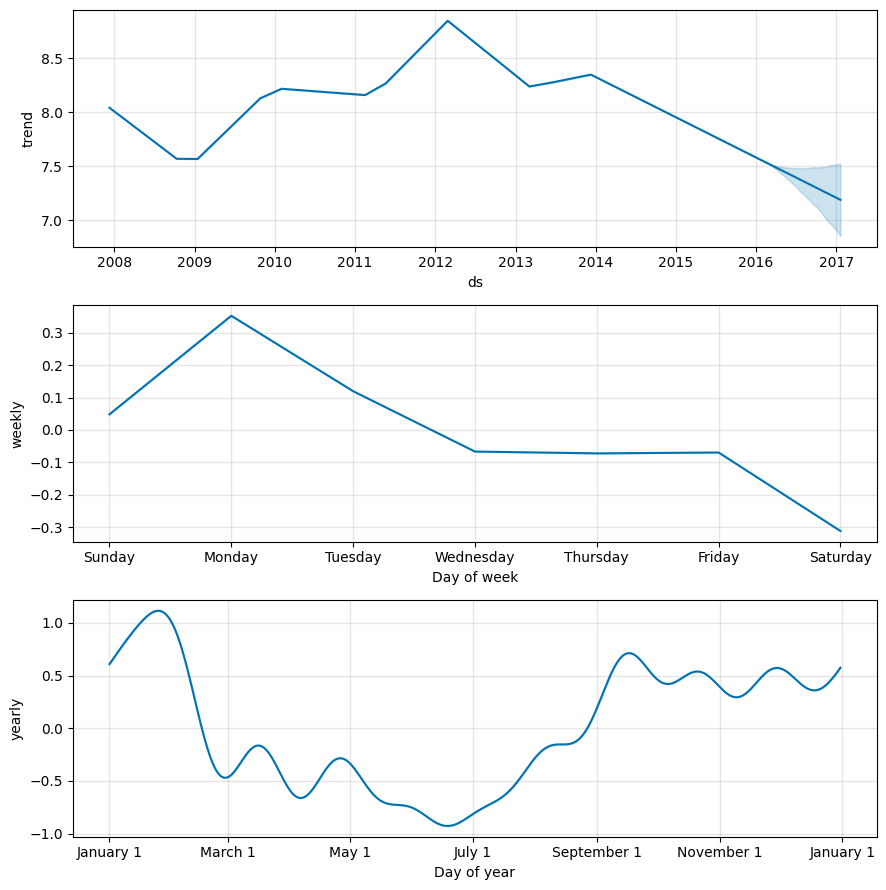

In [ ]:
# 요소 분석
fig2 = m.plot_components(forecast)

In [ ]:
# Plotly 사용
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast)

# Plotly 사용
plot_components_plotly(m, forecast)

'''예제 끝'''

[링크 텍스트](https://)##계절성, 휴일 효과 및 회귀변수

In [ ]:
''' 예제 시작 '''
# 슈퍼볼과 플레이오프 포함
# lower_window : 전날에도 영향을 미치는가, 0 또는 음수 ex) -1 : 하루 전까지 영향
# upper_window : 다음날에도 영향을 미치는가, 양수
# ds_upper : ds~ds_upper까지, 'yyyy-mm-dd'
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

In [ ]:
# 휴일 효과 반영 모델 생성
m = Prophet(holidays=holidays)
forecast = m.fit(df).predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz9cf7sfo/x8760tmb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz9cf7sfo/bcd38rqy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70710', 'data', 'file=/tmp/tmpz9cf7sfo/x8760tmb.json', 'init=/tmp/tmpz9cf7sfo/bcd38rqy.json', 'output', 'file=/tmp/tmpz9cf7sfo/prophet_modelukeyw81l/prophet_model-20231016103553.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:35:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:35:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# 휴일 효과 적용(예측에 포함)
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][
        ['ds', 'playoff', 'superbowl']][-10:]

,ds,playoff,superbowl
2190,2014-02-02,1.217847,1.200633
2191,2014-02-03,1.898839,1.455819
2532,2015-01-11,1.217847,0.000000
2533,2015-01-12,1.898839,0.000000
2901,2016-01-17,1.217847,0.000000
2902,2016-01-18,1.898839,0.000000
2908,2016-01-24,1.217847,0.000000
2909,2016-01-25,1.898839,0.000000
2922,2016-02-07,1.217847,1.200633
2923,2016-02-08,1.898839,1.455819


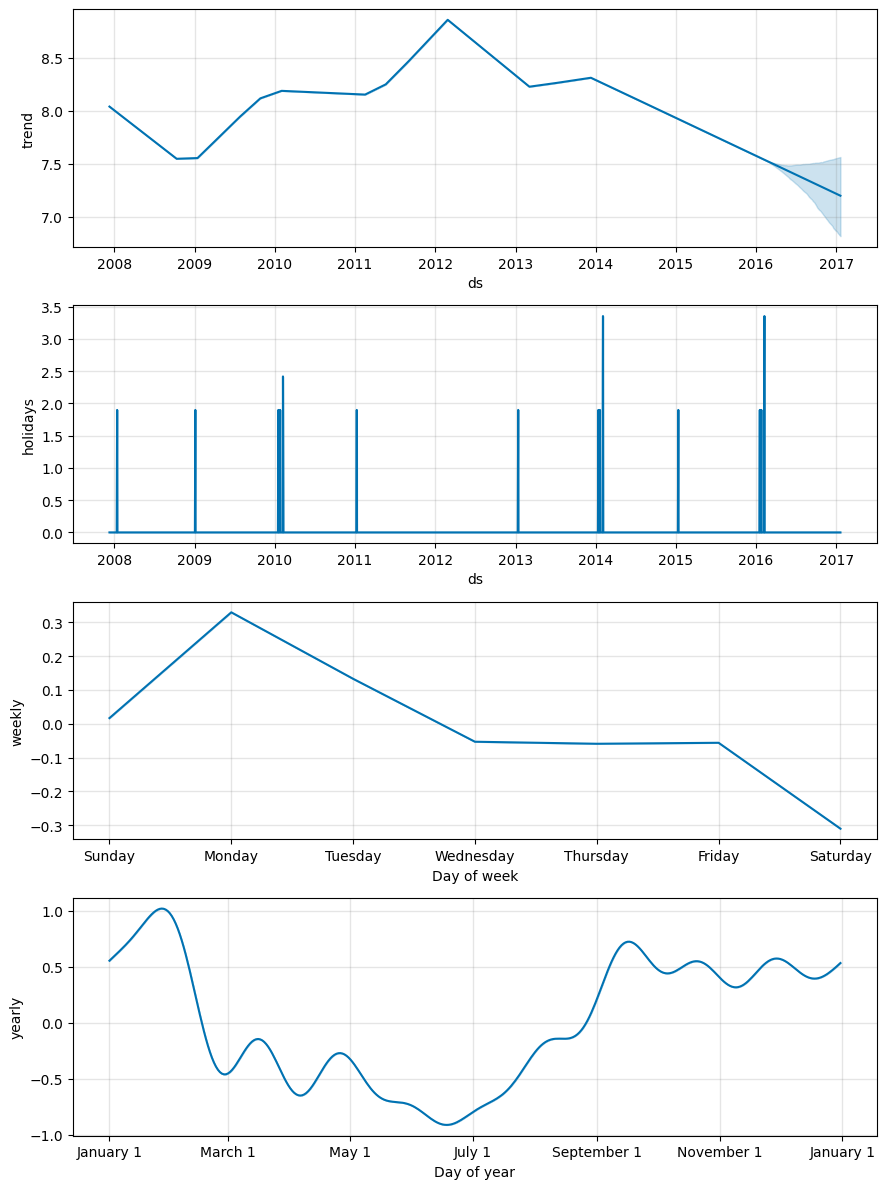

In [ ]:
# Plot, 출전일에 스파이크가 있으며 특히 슈퍼볼
forecast = m.predict(future)
fig = m.plot_components(forecast)

In [ ]:
# 국가별 공휴일
m = Prophet(holidays=holidays)
m.add_country_holidays(country_name='US')
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz9cf7sfo/0_q7frst.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz9cf7sfo/sugeroly.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65211', 'data', 'file=/tmp/tmpz9cf7sfo/0_q7frst.json', 'init=/tmp/tmpz9cf7sfo/sugeroly.json', 'output', 'file=/tmp/tmpz9cf7sfo/prophet_modeletnrplr2/prophet_model-20231016110339.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:03:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:03:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# https://github.com/vacanza/python-holidays/  # 범위는 1995년부터 2044년, 넘어가면 경고 발생
# https://github.com/facebook/prophet/blob/main/python/scripts/generate_holidays_file.py # 범위 조정
# 모델 속성/이름 확인
m.train_holiday_names

0                         playoff
1                       superbowl
2      Martin Luther King Jr. Day
3           Washington's Birthday
4                    Columbus Day
5                  New Year's Day
6                    Memorial Day
7                Independence Day
8                       Labor Day
9                    Veterans Day
10                   Thanksgiving
11                  Christmas Day
12       Christmas Day (Observed)
13        Veterans Day (Observed)
14    Independence Day (Observed)
15      New Year's Day (Observed)
dtype: object

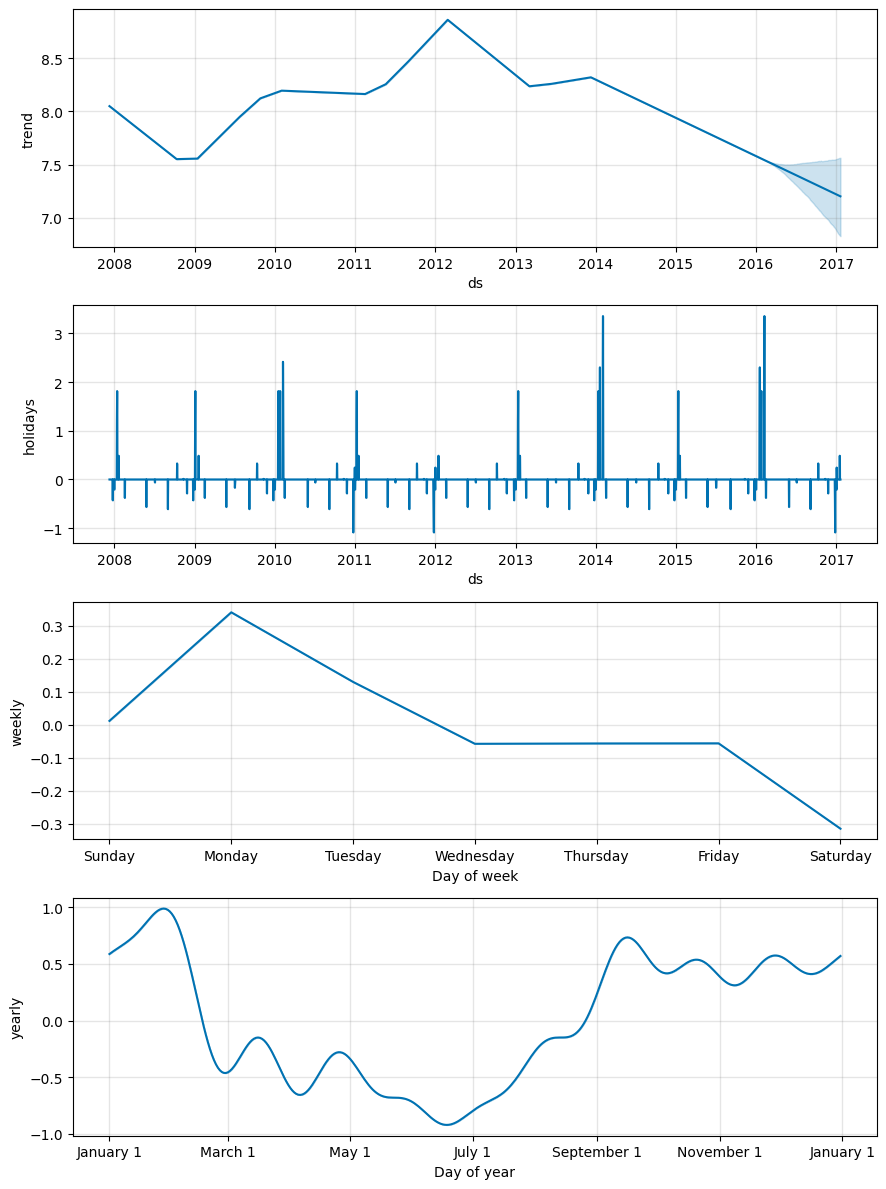

In [ ]:
# Python
forecast = m.predict(future)
fig = m.plot_components(forecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz9cf7sfo/x668ka3u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz9cf7sfo/8mj65q0u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71744', 'data', 'file=/tmp/tmpz9cf7sfo/x668ka3u.json', 'init=/tmp/tmpz9cf7sfo/8mj65q0u.json', 'output', 'file=/tmp/tmpz9cf7sfo/prophet_modelb1l3x31l/prophet_model-20231016104531.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:45:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:45:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


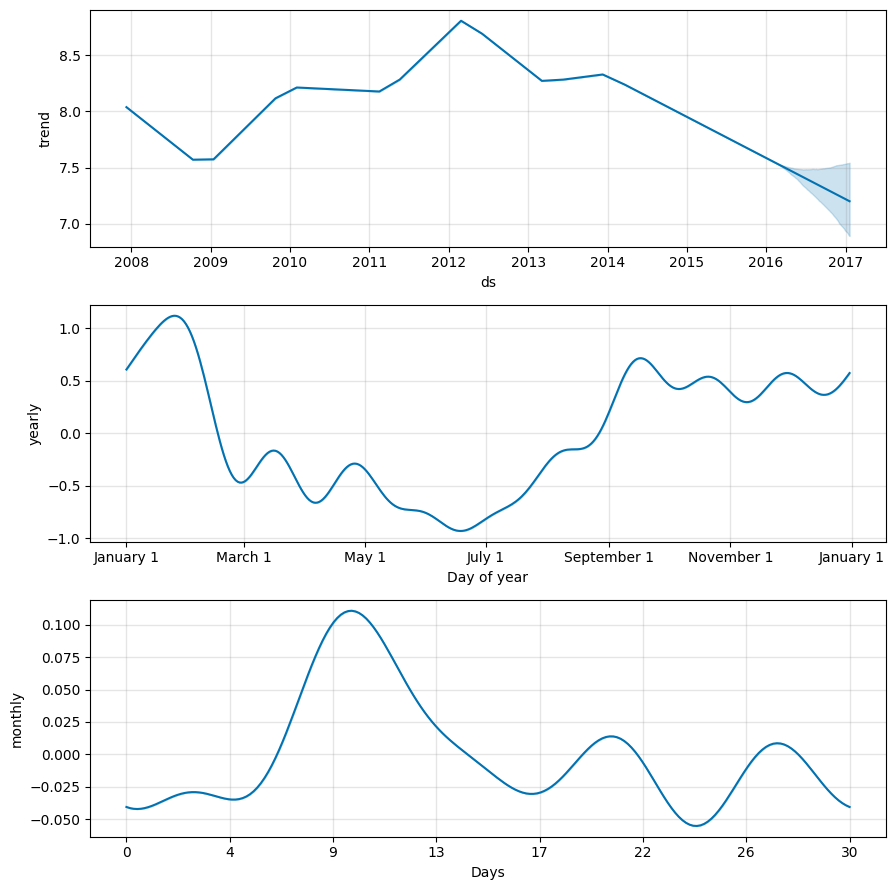

In [ ]:
#
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
forecast = m.fit(df).predict(future)
fig = m.plot_components(forecast)

In [ ]:
# Python
from prophet.make_holidays import make_holidays_df

nsw_holidays = make_holidays_df(
    year_list=[2019 + i for i in range(10)], country='AU', province='NSW'
)
nsw_holidays.head(n=10)

,ds,holiday
0,2019-01-26,Australia Day
1,2019-01-28,Australia Day (Observed)
2,2019-04-25,Anzac Day
3,2019-12-25,Christmas Day
4,2019-12-26,Boxing Day
5,2019-04-20,Easter Saturday
6,2019-04-21,Easter Sunday
7,2019-10-07,Labour Day
8,2019-06-10,Queen's Birthday
9,2019-08-05,Bank Holiday


In [ ]:
# 휴일 반영
from prophet import Prophet

m_nsw = Prophet(holidays=nsw_holidays)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz9cf7sfo/dcn4rw82.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz9cf7sfo/504qgjoi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=575', 'data', 'file=/tmp/tmpz9cf7sfo/dcn4rw82.json', 'init=/tmp/tmpz9cf7sfo/504qgjoi.json', 'output', 'file=/tmp/tmpz9cf7sfo/prophet_modelmmuo4yol/prophet_model-20231016084125.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:41:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:41:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


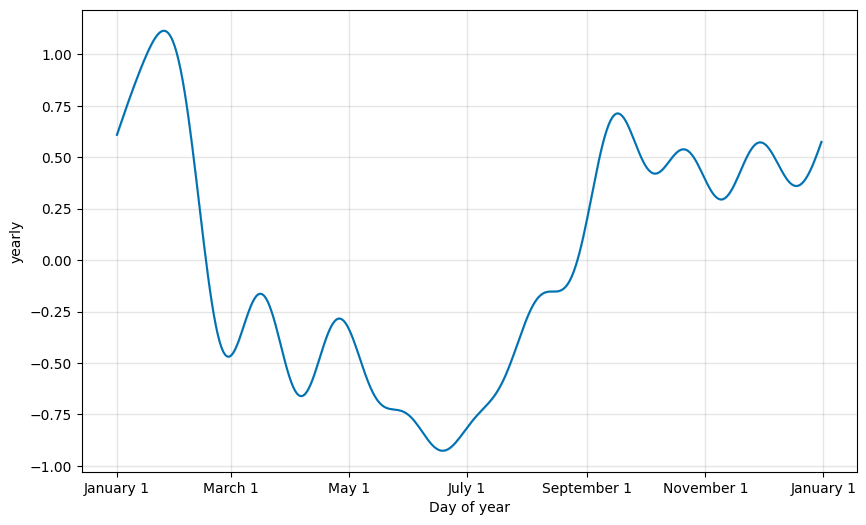

In [ ]:
# 계정성, 푸리에급수는 주기가 있는 함수를 삼각함수의 급수로 나타낸 것
from prophet.plot import plot_yearly
m = Prophet().fit(df)
a = plot_yearly(m)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz9cf7sfo/y1tbyhc8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz9cf7sfo/yj_i8lea.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46129', 'data', 'file=/tmp/tmpz9cf7sfo/y1tbyhc8.json', 'init=/tmp/tmpz9cf7sfo/yj_i8lea.json', 'output', 'file=/tmp/tmpz9cf7sfo/prophet_modelkeza9feq/prophet_model-20231016084145.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:41:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:41:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


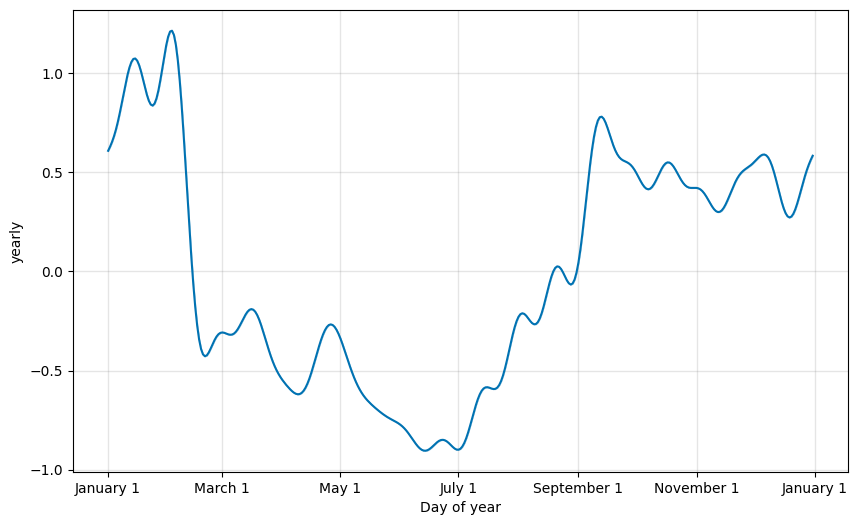

In [ ]:
# Python
from prophet.plot import plot_yearly
m = Prophet(yearly_seasonality=20).fit(df) # 20으로 증가
a = plot_yearly(m)

In [ ]:
# 특정 주에 대한 df
from prophet.make_holidays import make_holidays_df

nsw_holidays = make_holidays_df(
    year_list=[2019 + i for i in range(10)], country='AU', province='NSW'
)
nsw_holidays.head(n=10)

,ds,holiday
0,2019-01-26,Australia Day
1,2019-01-28,Australia Day (Observed)
2,2019-04-25,Anzac Day
3,2019-12-25,Christmas Day
4,2019-12-26,Boxing Day
5,2019-04-20,Easter Saturday
6,2019-04-21,Easter Sunday
7,2019-10-07,Labour Day
8,2019-06-10,Queen's Birthday
9,2019-08-05,Bank Holiday


In [ ]:
# 모델 생성
from prophet import Prophet

m_nsw = Prophet(holidays=nsw_holidays)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz9cf7sfo/qopav1_s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz9cf7sfo/ekg81zig.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47079', 'data', 'file=/tmp/tmpz9cf7sfo/qopav1_s.json', 'init=/tmp/tmpz9cf7sfo/ekg81zig.json', 'output', 'file=/tmp/tmpz9cf7sfo/prophet_model6t5d6di6/prophet_model-20231016104940.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:49:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:49:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


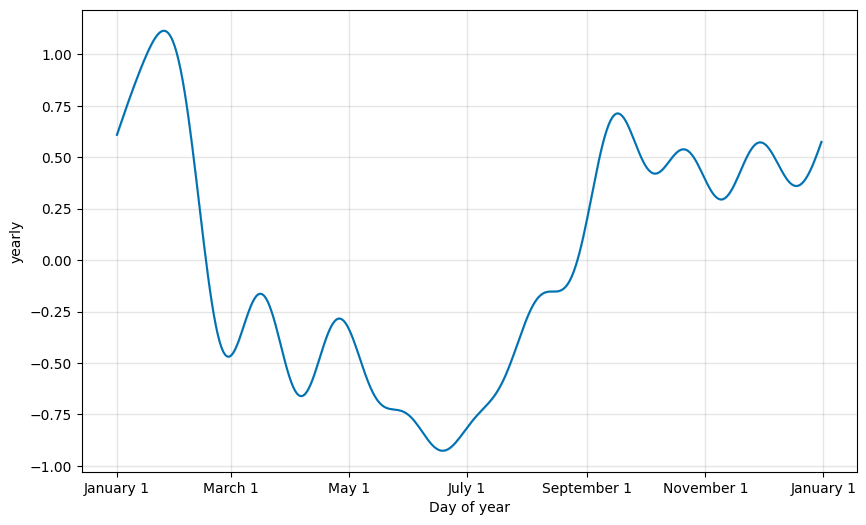

In [ ]:
# 계절
from prophet.plot import plot_yearly
m = Prophet().fit(df)
a = plot_yearly(m)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz9cf7sfo/i6gddnab.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz9cf7sfo/qg1q6jzw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59503', 'data', 'file=/tmp/tmpz9cf7sfo/i6gddnab.json', 'init=/tmp/tmpz9cf7sfo/qg1q6jzw.json', 'output', 'file=/tmp/tmpz9cf7sfo/prophet_model0t7mq0ve/prophet_model-20231016105021.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:50:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:50:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


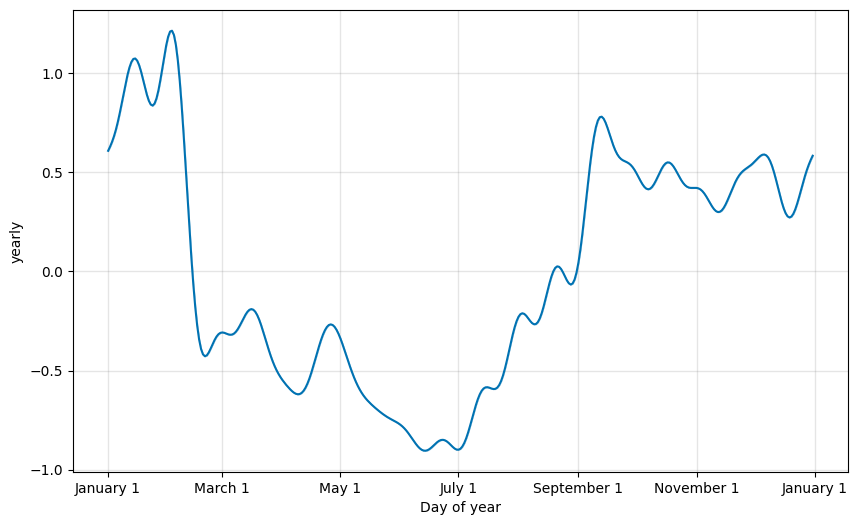

In [ ]:
# 계절성 증가
from prophet.plot import plot_yearly
m = Prophet(yearly_seasonality=20).fit(df)
a = plot_yearly(m)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz9cf7sfo/_6a27tgd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz9cf7sfo/io94d8az.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36298', 'data', 'file=/tmp/tmpz9cf7sfo/_6a27tgd.json', 'init=/tmp/tmpz9cf7sfo/io94d8az.json', 'output', 'file=/tmp/tmpz9cf7sfo/prophet_model7k6oo947/prophet_model-20231016105109.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:51:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:51:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


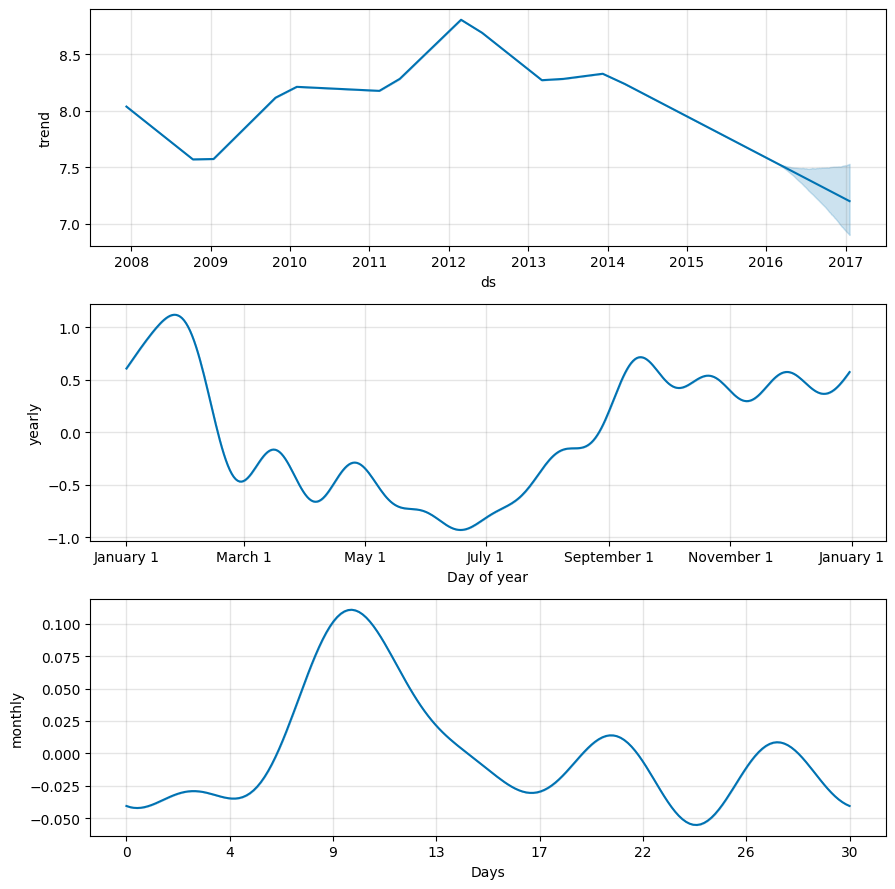

In [ ]:
# 푸리에 사용
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
forecast = m.fit(df).predict(future)
fig = m.plot_components(forecast)

In [ ]:
# 성수기/비성수기
def is_nfl_season(ds):
    date = pd.to_datetime(ds)
    return (date.month > 8 or date.month < 2)

df['on_season'] = df['ds'].apply(is_nfl_season)
df['off_season'] = ~df['ds'].apply(is_nfl_season)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz9cf7sfo/y3znuf5_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz9cf7sfo/bug2pnsh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5199', 'data', 'file=/tmp/tmpz9cf7sfo/y3znuf5_.json', 'init=/tmp/tmpz9cf7sfo/bug2pnsh.json', 'output', 'file=/tmp/tmpz9cf7sfo/prophet_modeln8zcetp0/prophet_model-20231016105237.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:52:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:52:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


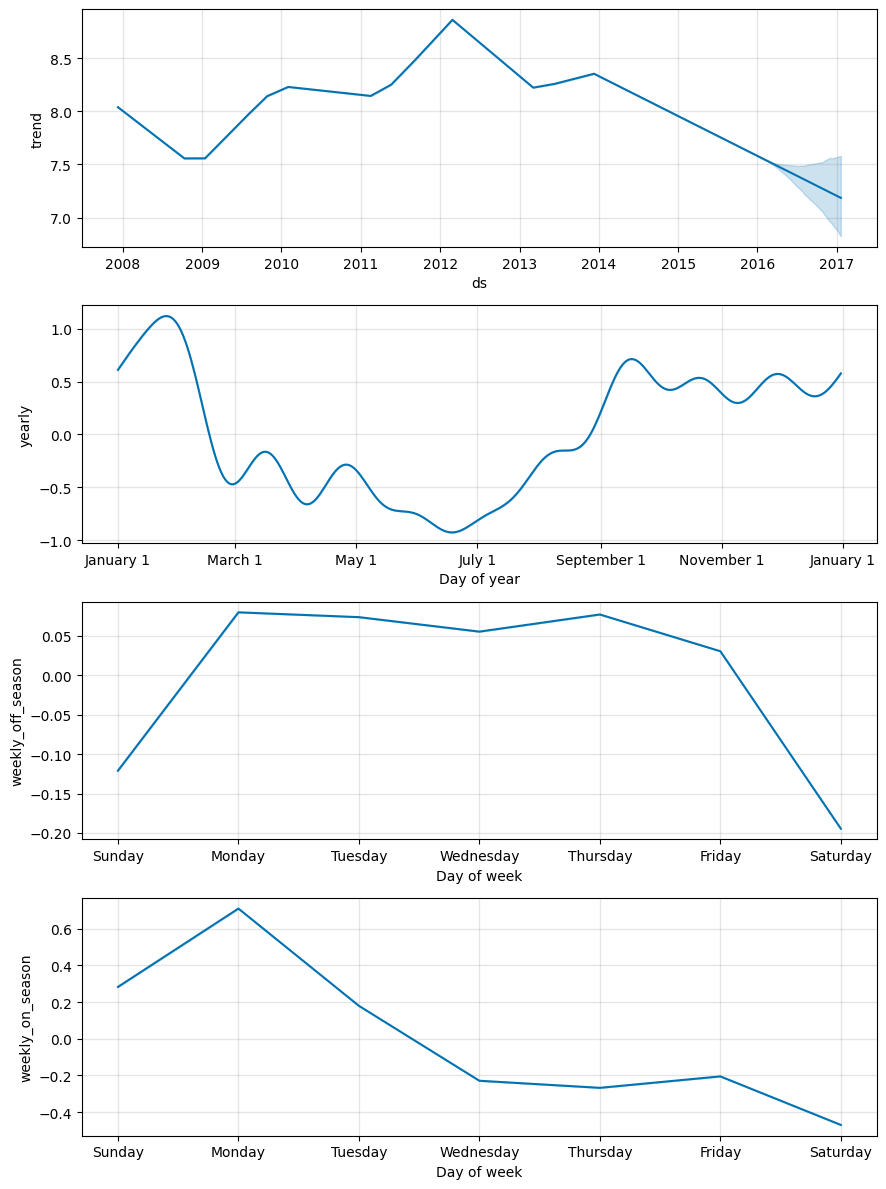

In [ ]:
# 주별 계절성 적용
# 매주 일요일에 경기가 열리는 비수기에는 경기가 전혀 없는 일요일과 월요일에 큰 증가가 있는 것을 알 수 있습니다.
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='weekly_on_season', period=7, fourier_order=3, condition_name='on_season')
m.add_seasonality(name='weekly_off_season', period=7, fourier_order=3, condition_name='off_season')

future['on_season'] = future['ds'].apply(is_nfl_season)
future['off_season'] = ~future['ds'].apply(is_nfl_season)
forecast = m.fit(df).predict(future)
fig = m.plot_components(forecast)

In [ ]:
# 휴일 과적합 조정, 휴일 효과가 약해짐, 슈퍼볼의 경우 줄어듬
m = Prophet(holidays=holidays, holidays_prior_scale=0.05).fit(df) # 너무 크면 오버 피팅
forecast = m.predict(future)
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][
    ['ds', 'playoff', 'superbowl']][-10:]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz9cf7sfo/tkn90jty.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz9cf7sfo/wq9an85r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89441', 'data', 'file=/tmp/tmpz9cf7sfo/tkn90jty.json', 'init=/tmp/tmpz9cf7sfo/wq9an85r.json', 'output', 'file=/tmp/tmpz9cf7sfo/prophet_model8ag7kv4d/prophet_model-20231016105339.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:53:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:53:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,playoff,superbowl
2190,2014-02-02,1.206360,0.962841
2191,2014-02-03,1.851229,0.997293
2532,2015-01-11,1.206360,0.000000
2533,2015-01-12,1.851229,0.000000
2901,2016-01-17,1.206360,0.000000
2902,2016-01-18,1.851229,0.000000
2908,2016-01-24,1.206360,0.000000
2909,2016-01-25,1.851229,0.000000
2922,2016-02-07,1.206360,0.962841
2923,2016-02-08,1.851229,0.997293


In [ ]:
# 주간 계절성 척도 설정
m = Prophet()
m.add_seasonality(
    name='weekly', period=7, fourier_order=3, prior_scale=0.1)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz9cf7sfo/sbtdym4b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz9cf7sfo/d28rdbug.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7648', 'data', 'file=/tmp/tmpz9cf7sfo/sbtdym4b.json', 'init=/tmp/tmpz9cf7sfo/d28rdbug.json', 'output', 'file=/tmp/tmpz9cf7sfo/prophet_modeltejtqxty/prophet_model-20231016105525.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:55:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:55:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


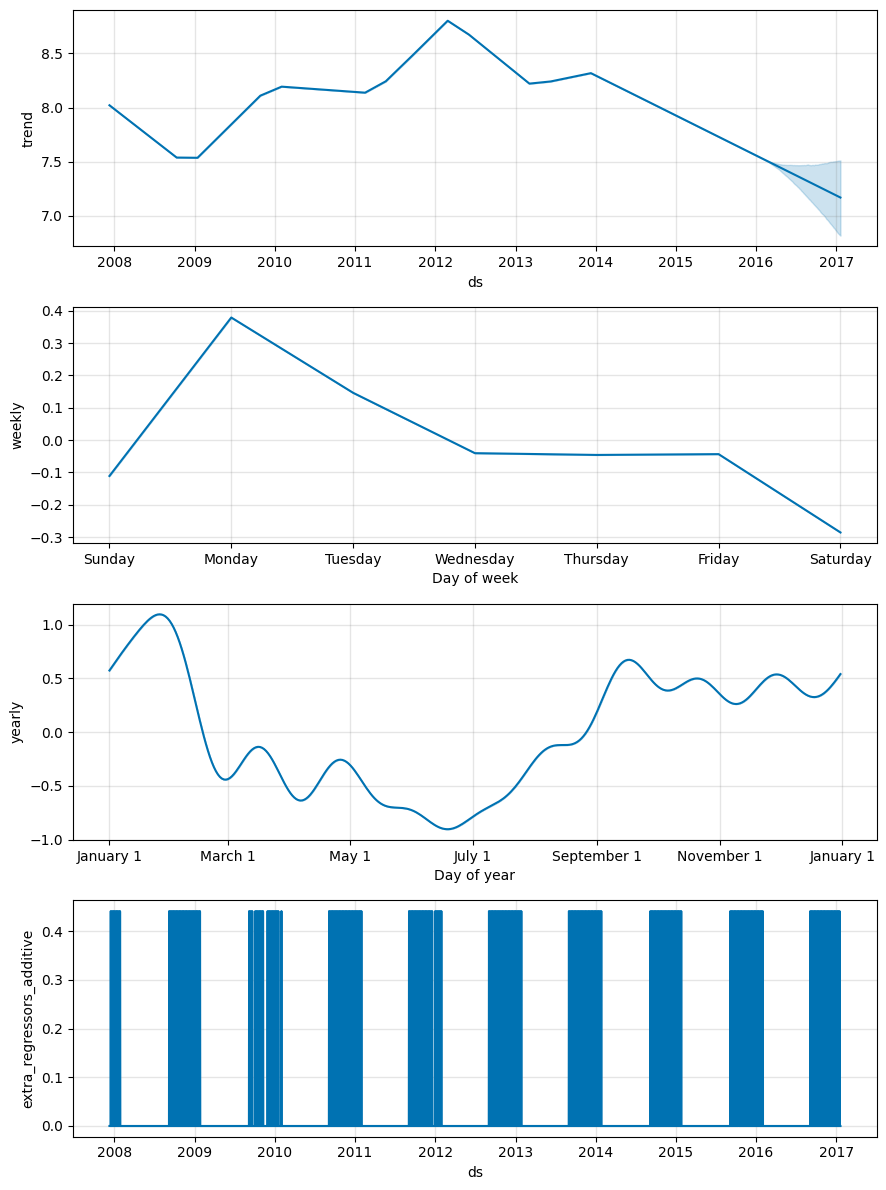

In [ ]:
# 회귀 적용(일요일에 추가효과)
def nfl_sunday(ds):
    date = pd.to_datetime(ds)
    if date.weekday() == 6 and (date.month > 8 or date.month < 2):
        return 1
    else:
        return 0
df['nfl_sunday'] = df['ds'].apply(nfl_sunday)

m = Prophet()
m.add_regressor('nfl_sunday')
m.fit(df)

future['nfl_sunday'] = future['ds'].apply(nfl_sunday)

forecast = m.predict(future)
fig = m.plot_components(forecast)